# Big Data Mart Sales Problem

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 



In [1]:
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv'
df1=pd.read_csv(url)
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
url1='https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv'
df=pd.read_csv(url1)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Encoding DataFrame

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [10]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))
df1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,3,1,1


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df1.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [13]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [14]:
df['Item_Weight']=df['Item_Weight'].fillna(np.mean(df['Item_Weight']))


In [15]:
df1['Item_Weight']=df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Visualization of Data

In [18]:
df.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [19]:
df1.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

As both the data are same so we will do EDA only on df

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='Item_Identifier', ylabel='Count'>

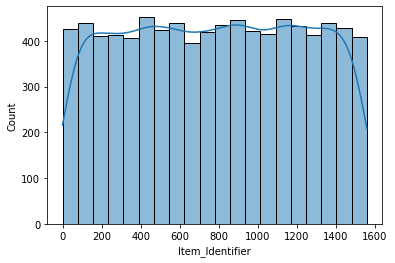

In [21]:
sns.histplot(x='Item_Identifier',bins=20,data=df,kde=True)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Count'>

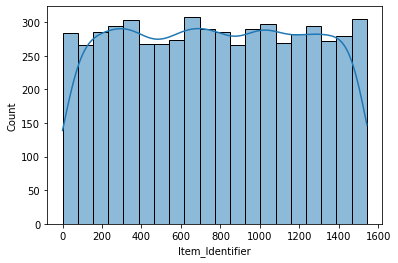

In [22]:
sns.histplot(x='Item_Identifier',bins=20,data=df1,kde=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

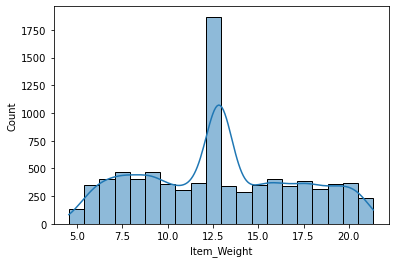

In [23]:
sns.histplot(x='Item_Weight',bins=20,data=df,kde=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

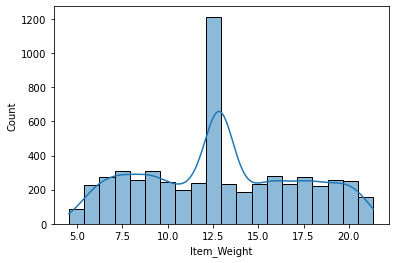

In [24]:
sns.histplot(x='Item_Weight',bins=20,data=df1,kde=True)

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64


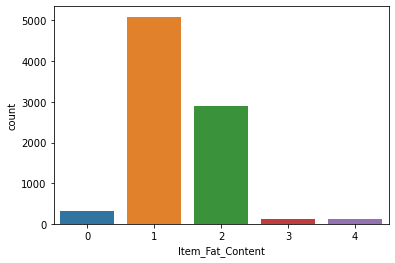

In [25]:
sns.countplot(x='Item_Fat_Content',data=df)
print(df['Item_Fat_Content'].value_counts())

1    3396
2    1935
0     206
4      78
3      66
Name: Item_Fat_Content, dtype: int64


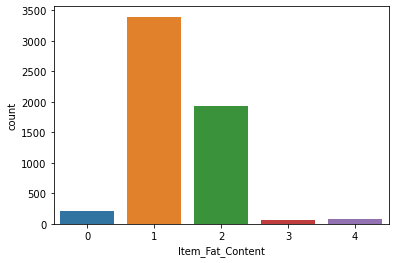

In [26]:
sns.countplot(x='Item_Fat_Content',data=df1)
print(df1['Item_Fat_Content'].value_counts())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

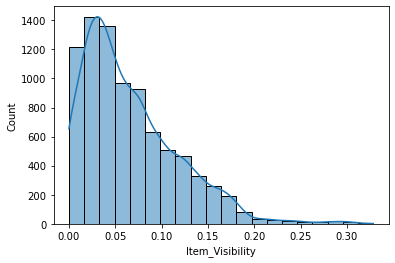

In [27]:
sns.histplot(x='Item_Visibility',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

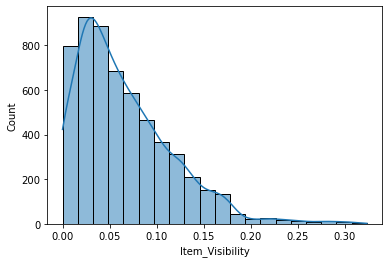

In [28]:
sns.histplot(x='Item_Visibility',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='Item_Type', ylabel='Count'>

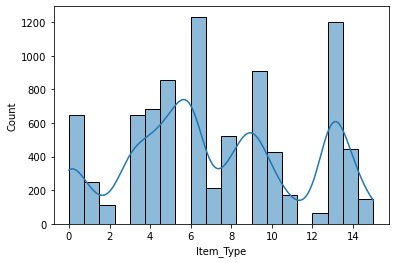

In [29]:
sns.histplot(x='Item_Type',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Item_Type', ylabel='Count'>

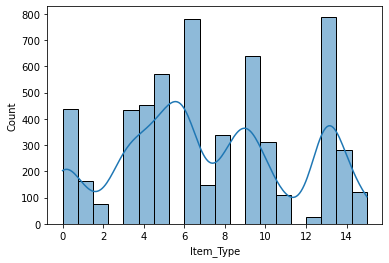

In [30]:
sns.histplot(x='Item_Type',data=df1,bins=20,kde=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

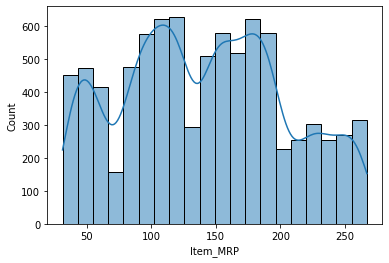

In [31]:
sns.histplot(x='Item_MRP',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

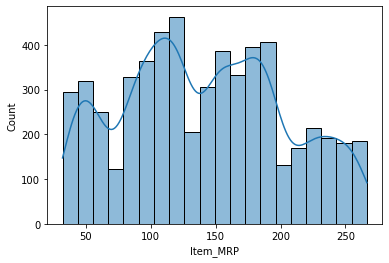

In [32]:
sns.histplot(x='Item_MRP',data=df1,bins=20,kde=True)

5    935
1    932
6    930
9    930
8    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64


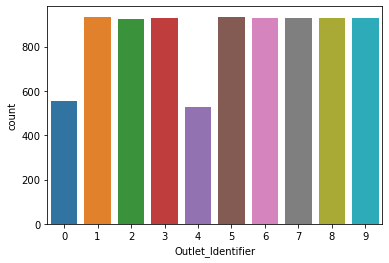

In [33]:
sns.countplot(x='Outlet_Identifier',data=df)
print(df['Outlet_Identifier'].value_counts())

5    624
1    621
6    620
9    620
8    620
7    619
3    618
2    617
0    370
4    352
Name: Outlet_Identifier, dtype: int64


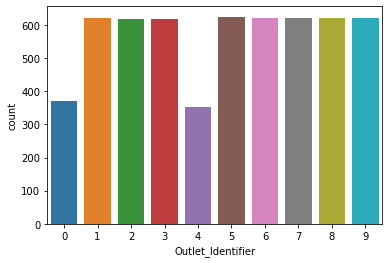

In [34]:
sns.countplot(x='Outlet_Identifier',data=df1)
print(df1['Outlet_Identifier'].value_counts())

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


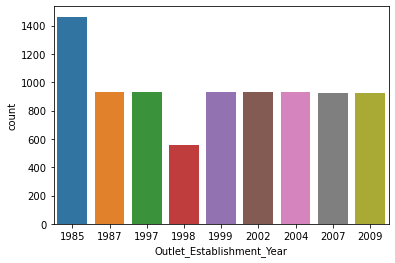

In [35]:
sns.countplot(x='Outlet_Establishment_Year',data=df)
print(df['Outlet_Establishment_Year'].value_counts())

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64


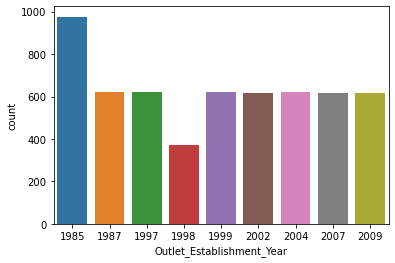

In [36]:
sns.countplot(x='Outlet_Establishment_Year',data=df1)
print(df1['Outlet_Establishment_Year'].value_counts())

1    2793
3    2410
2    2388
0     932
Name: Outlet_Size, dtype: int64


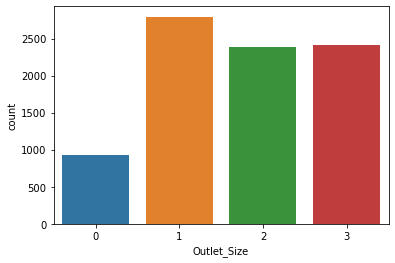

In [37]:
sns.countplot(x='Outlet_Size',data=df)
print(df['Outlet_Size'].value_counts())

1    1862
3    1606
2    1592
0     621
Name: Outlet_Size, dtype: int64


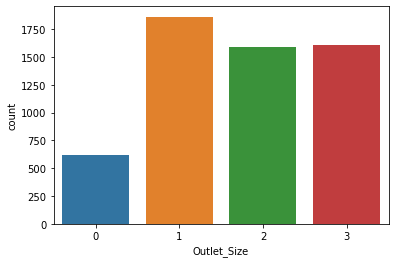

In [38]:
sns.countplot(x='Outlet_Size',data=df1)
print(df1['Outlet_Size'].value_counts())

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64


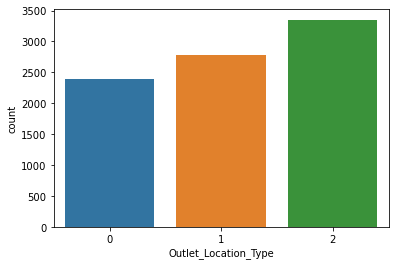

In [39]:
sns.countplot(x='Outlet_Location_Type',data=df)
print(df['Outlet_Location_Type'].value_counts())

2    2233
1    1856
0    1592
Name: Outlet_Location_Type, dtype: int64


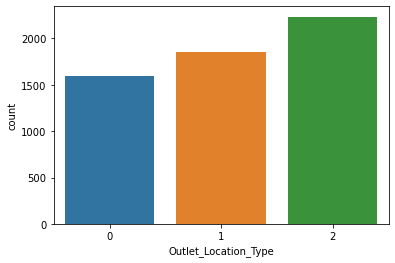

In [40]:
sns.countplot(x='Outlet_Location_Type',data=df1)
print(df1['Outlet_Location_Type'].value_counts())

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64


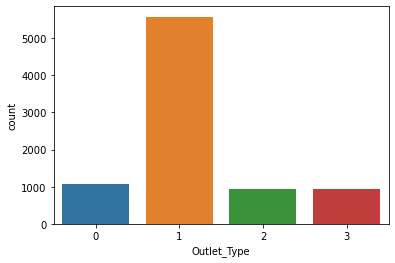

In [41]:
sns.countplot(x='Outlet_Type',data=df)
print(df['Outlet_Type'].value_counts())

1    3717
0     722
3     624
2     618
Name: Outlet_Type, dtype: int64


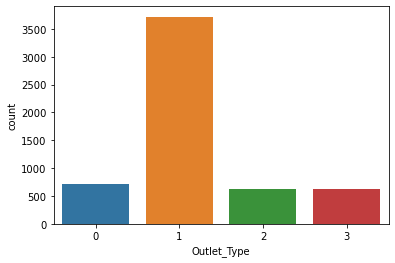

In [42]:
sns.countplot(x='Outlet_Type',data=df1)
print(df1['Outlet_Type'].value_counts())

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

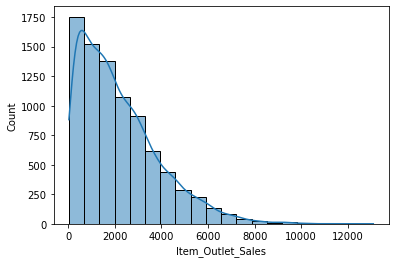

In [43]:
sns.histplot(x='Item_Outlet_Sales',data=df,bins=20,kde=True)

# Describing DataSets

In [44]:
import matplotlib.pyplot as plt

In [45]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.736360,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.989181,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


In [46]:
df1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.931278,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.736314,1.112832,1.201373
std,445.525926,4.253478,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.989113,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.395000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.857645,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,2.000000,1.000000,1.000000
75%,1160.000000,16.200000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,3.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,3.000000,2.000000,3.000000


<AxesSubplot:>

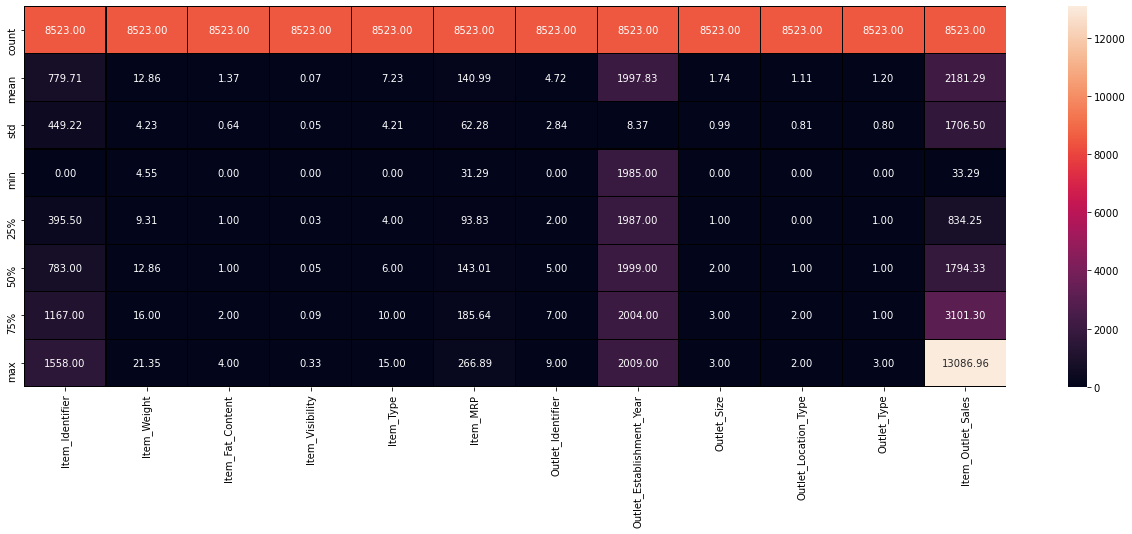

In [47]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,data=df,linecolor='black',linewidth=0.1,fmt='0.2f')

<AxesSubplot:>

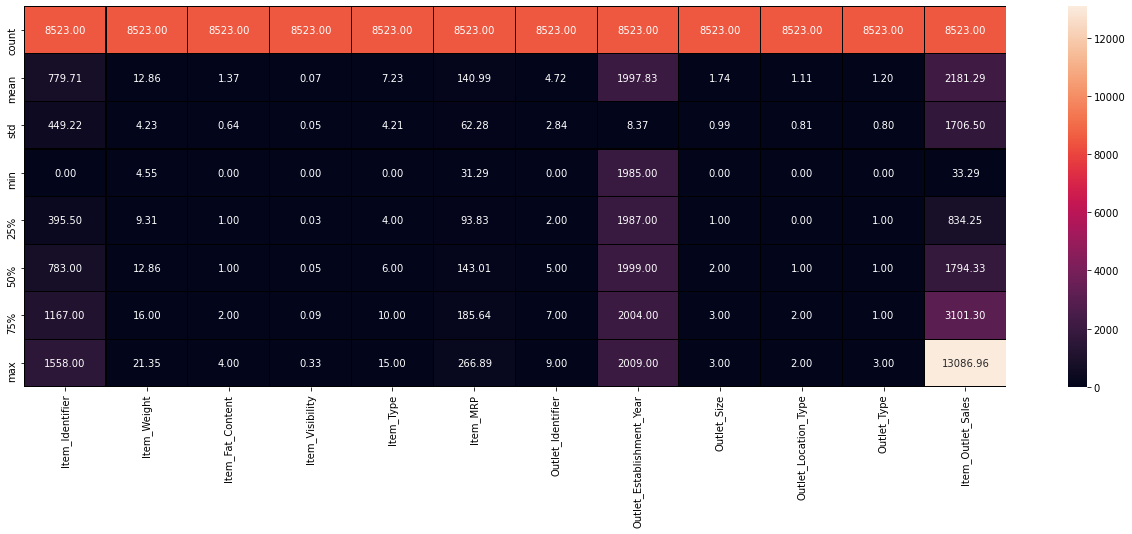

In [48]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,data=df1,linecolor='black',linewidth=0.1,fmt='0.2f')

In [49]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.004795,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,0.000855,-0.015096,-0.004795,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367


In [50]:
df1.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,-0.000166,-0.093344,-0.063856,-0.003236,0.007537,0.010162,0.011728,0.005649,-0.011657,-0.009553
Item_Weight,-0.000166,1.000000,0.004581,-0.001710,0.007119,-0.023962,0.018968,0.001970,0.019540,-0.019452,-0.014198
Item_Fat_Content,-0.093344,0.004581,1.000000,0.033591,-0.128945,-0.014283,-0.000792,-0.010088,-0.004325,-0.000130,0.000387
Item_Visibility,-0.063856,-0.001710,0.033591,1.000000,-0.036237,-0.014013,-0.114857,-0.097040,0.091566,-0.001146,-0.154042
Item_Type,-0.003236,0.007119,-0.128945,-0.036237,1.000000,0.060990,0.000333,0.000204,-0.005120,0.000584,0.006179
Item_MRP,0.007537,-0.023962,-0.014283,-0.014013,0.060990,1.000000,-0.006412,-0.007233,0.001641,0.001754,0.003326
Outlet_Identifier,0.010162,0.018968,-0.000792,-0.114857,0.000333,-0.006412,1.000000,0.079065,0.053055,-0.716113,0.099937
Outlet_Establishment_Year,0.011728,0.001970,-0.010088,-0.097040,0.000204,-0.007233,0.079065,1.000000,0.470456,-0.089496,-0.122841
Outlet_Size,0.005649,0.019540,-0.004325,0.091566,-0.005120,0.001641,0.053055,0.470456,1.000000,-0.290147,-0.432138
Outlet_Location_Type,-0.011657,-0.019452,-0.000130,-0.001146,0.000584,0.001754,-0.716113,-0.089496,-0.290147,1.000000,0.467299


<AxesSubplot:>

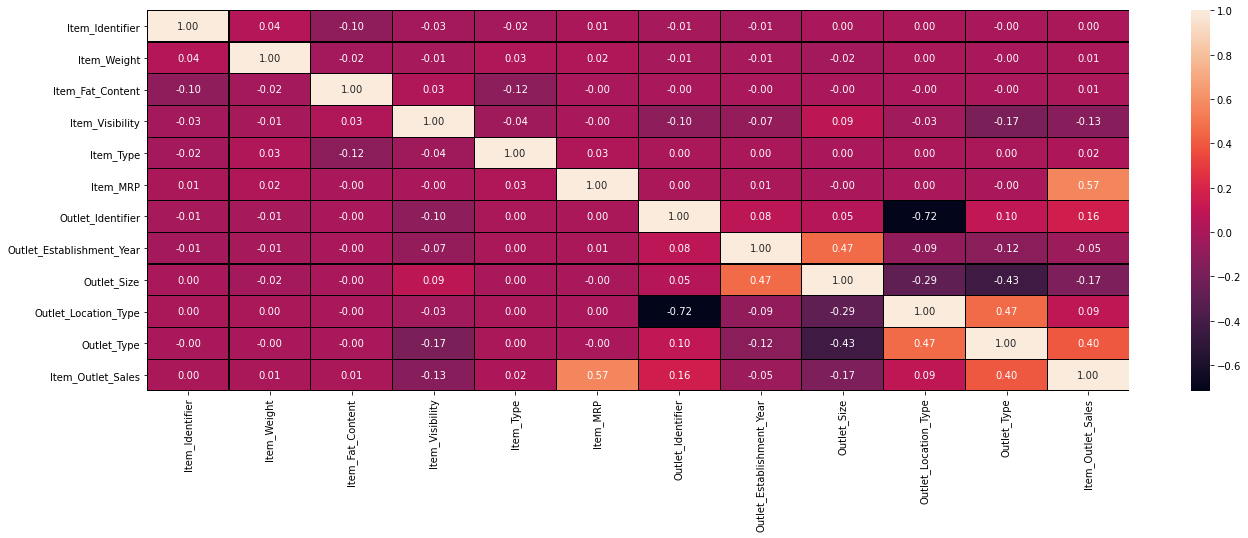

In [51]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,data=df,linecolor='black',linewidth=0.1,fmt='0.2f')

<AxesSubplot:>

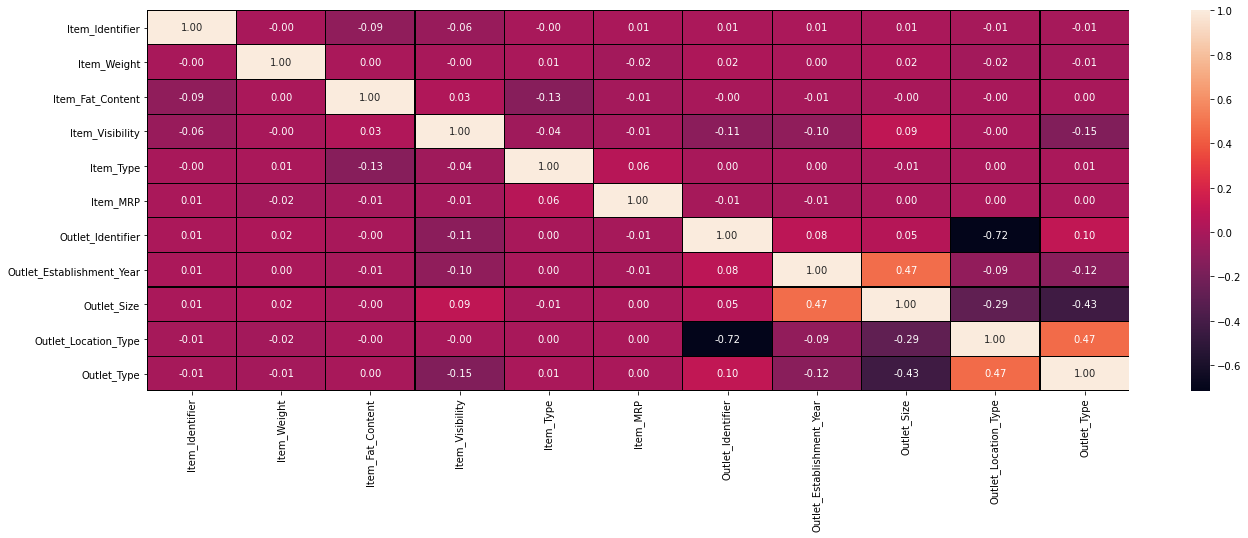

In [52]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.corr(),annot=True,data=df,linecolor='black',linewidth=0.1,fmt='0.2f')

# Outliers Removal

In [53]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Taking -/+0.5 as the threshold value

<AxesSubplot:>

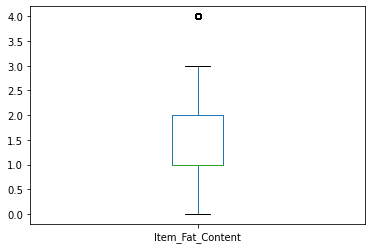

In [54]:
df['Item_Fat_Content'].plot.box()

<AxesSubplot:>

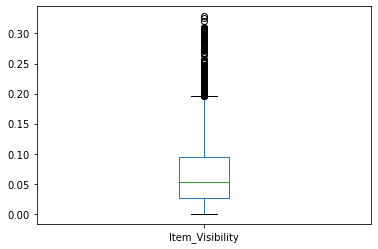

In [55]:
df['Item_Visibility'].plot.box()

<AxesSubplot:>

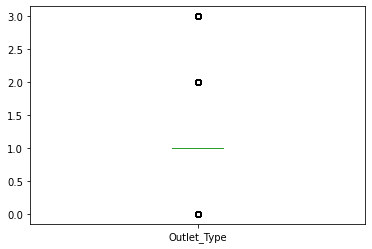

In [56]:
df['Outlet_Type'].plot.box()

<AxesSubplot:>

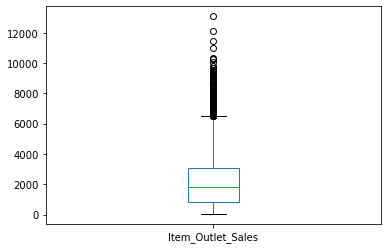

In [57]:
df['Item_Outlet_Sales'].plot.box()

In [58]:
df1.skew()

Item_Identifier             -0.000020
Item_Weight                  0.068050
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.131755
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

Taking -/+0.5 as the threshold value

<AxesSubplot:>

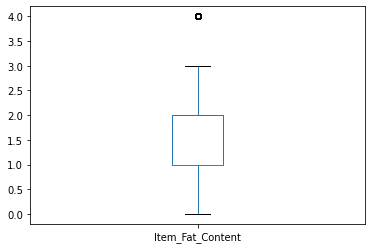

In [59]:
df1['Item_Fat_Content'].plot.box()

<AxesSubplot:>

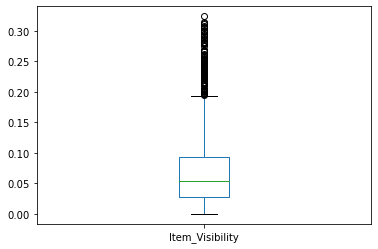

In [60]:
df1['Item_Visibility'].plot.box()

<AxesSubplot:>

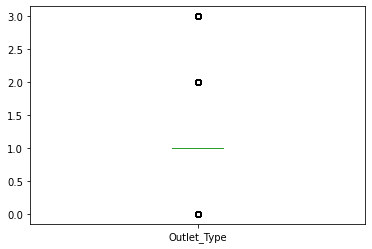

In [61]:
df1['Outlet_Type'].plot.box()

In [62]:
df.shape

(8523, 12)

In [63]:
from scipy.stats import zscore

In [64]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [65]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [66]:
Data_Loss=((8523-8222)/8523)*100
Data_Loss

3.5316203214830457

In [67]:
df1.shape

(5681, 11)

In [68]:
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([   1,   46,   76,   78,   89,  103,  138,  242,  333,  369,  385,
         474,  499,  543,  595,  637,  739,  783,  797,  815,  858,  871,
         985,  996, 1025, 1037, 1046, 1105, 1143, 1191, 1256, 1256, 1270,
        1284, 1314, 1321, 1411, 1422, 1437, 1516, 1539, 1547, 1577, 1616,
        1710, 1757, 1780, 1812, 1823, 1853, 1857, 1915, 1919, 1927, 2019,
        2070, 2167, 2179, 2230, 2271, 2275, 2365, 2365, 2380, 2393, 2504,
        2516, 2561, 2595, 2605, 2609, 2625, 2628, 2677, 2779, 2798, 2836,
        2843, 2866, 2915, 2926, 3039, 3077, 3097, 3267, 3294, 3313, 3316,
        3346, 3357, 3362, 3378, 3461, 3502, 3565, 3622, 3638, 3679, 3744,
        3778, 3783, 3950, 3970, 4021, 4052, 4133, 4146, 4147, 4148, 4159,
        4208, 4232, 4255, 4328, 4330, 4334, 4340, 4352, 4365, 4421, 4478,
        4542, 4575, 4616, 4616, 4689, 4692, 4726, 4801, 4804, 4845, 4846,
        4870, 4919, 4921, 4941, 4965, 4970, 4976, 4999, 5121, 5132, 5154,
        5157, 5168, 5277, 5290, 5323, 

In [69]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,9.300000,1,0.007565,13,107.8622,9,1999,1,0,1
2,1406,17.500000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,19.200000,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,8.930000,2,0.118599,4,234.2300,5,1985,1,2,3
5,461,10.395000,2,0.063817,6,117.1492,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,15.100000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,12.150000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.695000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,12.857645,2,0.000000,3,214.6218,2,2007,3,1,1


In [70]:
Data_loss1=((5681-5525)/5681)*100
Data_loss1

2.745995423340961

In [71]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [72]:
df1_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,9.300000,1,0.007565,13,107.8622,9,1999,1,0,1
2,1406,17.500000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,19.200000,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,8.930000,2,0.118599,4,234.2300,5,1985,1,2,3
5,461,10.395000,2,0.063817,6,117.1492,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,15.100000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,12.150000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.695000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,12.857645,2,0.000000,3,214.6218,2,2007,3,1,1


# Separating Data in x and y

In [81]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

# Transforming Data

In [80]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.38628037, -0.82814325, -0.50377743, ..., -0.75957593,
        -1.32087098, -0.11141597],
       [-1.87430883, -1.69854243,  1.00677793, ..., -0.75957593,
         1.12291351,  1.0376838 ],
       [-0.24910933,  1.09228442, -0.50377743, ..., -0.75957593,
        -1.32087098, -0.11141597],
       ...,
       [ 1.27688613, -0.51110984, -0.50377743, ...,  0.23141827,
        -0.21814017, -0.11141597],
       [-0.20860379, -1.35664553,  1.00677793, ..., -0.75957593,
         1.12291351,  1.0376838 ],
       [-1.69923032,  0.47766723, -0.50377743, ...,  0.23141827,
        -1.32087098, -0.11141597]])

# Scaling Data

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.46103862, -0.82263635, -0.52097741, ..., -0.73970043,
        -1.37384276, -0.12348771],
       [-2.09385818, -1.73380133,  1.00987141, ..., -0.73970043,
         1.08832445,  1.04059102],
       [-0.15401841,  1.08636176, -0.52097741, ..., -0.73970043,
        -1.37384276, -0.12348771],
       ...,
       [ 1.20607271, -0.49655592, -0.52097741, ...,  0.27199043,
        -0.13111325, -0.12348771],
       [-0.11255898, -1.37344321,  1.00987141, ..., -0.73970043,
         1.08832445,  1.04059102],
       [-1.86245653,  0.49178563, -0.52097741, ...,  0.27199043,
        -1.37384276, -0.12348771]])

# Model Selection

In [76]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [77]:
train=df_new
test=df1_new

In [82]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At ranodm state{i} the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i} the testing accuracy is :- {r2_score(y_test,pred_test)}')
    print('/n')

At ranodm state0 the training accuracy is :- 0.5017114752861898
At random state 0 the testing accuracy is :- 0.5021009820126386
/n
At ranodm state1 the training accuracy is :- 0.5033376444735591
At random state 1 the testing accuracy is :- 0.4970722440989547
/n
At ranodm state2 the training accuracy is :- 0.49973817037021684
At random state 2 the testing accuracy is :- 0.5065907111845083
/n
At ranodm state3 the training accuracy is :- 0.49289752549390686
At random state 3 the testing accuracy is :- 0.5286368560153005
/n
At ranodm state4 the training accuracy is :- 0.5041717486713211
At random state 4 the testing accuracy is :- 0.4928384319635095
/n
At ranodm state5 the training accuracy is :- 0.5005086492069679
At random state 5 the testing accuracy is :- 0.5056278490406841
/n
At ranodm state6 the training accuracy is :- 0.5006511686239135
At random state 6 the testing accuracy is :- 0.5049916642066017
/n
At ranodm state7 the training accuracy is :- 0.507140594949689
At random state 7 

In [83]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [ ]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    svr.fit(x_train,y_train)
    predsvr_train=svr.predict(x_train)
    predsvr_test=svr.predict(x_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

In [86]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()

In [ ]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

In [88]:
pred_test=lr.predict(x_test)
pred_test

array([1401.87496063, 2018.09287737, 3948.8009915 , ..., 2655.55327264,
       1944.12251972, 1719.74359949])

In [89]:
print(r2_score(y_test,pred_test))

0.5168629635988756


# Cross Validation of Datasets

In [91]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv_score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv_score is 0.49911428554778026 and the accuracy score for training is 0.4963253456163994 and the accuracy score for testing is 0.5168629635988756


At cross fold 3 the cv_score is 0.49982599056707216 and the accuracy score for training is 0.4963253456163994 and the accuracy score for testing is 0.5168629635988756


At cross fold 4 the cv_score is 0.498890812410068 and the accuracy score for training is 0.4963253456163994 and the accuracy score for testing is 0.5168629635988756


At cross fold 5 the cv_score is 0.4997865215781621 and the accuracy score for training is 0.4963253456163994 and the accuracy score for testing is 0.5168629635988756


At cross fold 6 the cv_score is 0.4992610830290265 and the accuracy score for training is 0.4963253456163994 and the accuracy score for testing is 0.5168629635988756


At cross fold 7 the cv_score is 0.5003453709916137 and the accuracy score for training is 0.4963253456163994 and the accuracy score for testing is 0.5168629635

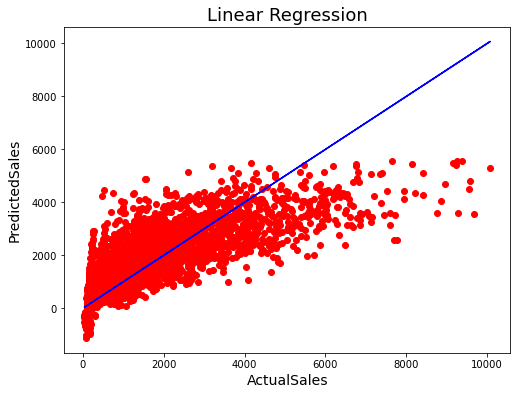

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('ActualSales',fontsize=14)
plt.ylabel('PredictedSales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [94]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [95]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5168657777216197

# Ensemble Technique

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [97]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 59.918450005485234
Cross Val Score : 57.42013366064172


# Saving the model

In [98]:
import pickle
filename='BigDataSales.pred'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [99]:
loaded_model=pickle.load(open('BigDataSales.pred','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5991845000548524


In [100]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130
Predicted,1295.360506,2198.381717,4710.441788,2531.481457,1183.19318,3903.18592,4219.301102,1763.351326,281.443647,97.103601,...,2467.181822,1430.421365,1227.382326,2888.979438,3414.628538,3380.180046,3258.172196,3595.280052,2518.335236,1899.72714
Original,1295.360506,2198.381717,4710.441788,2531.481457,1183.19318,3903.18592,4219.301102,1763.351326,281.443647,97.103601,...,2467.181822,1430.421365,1227.382326,2888.979438,3414.628538,3380.180046,3258.172196,3595.280052,2518.335236,1899.72714
